### Traditional ML

In [2]:
# --- Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
# Reproducibility
np.random.seed(42)

# Load the dataset

In [5]:
df = pd.read_csv("WineQT.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [6]:
# --- Basic sanity check ---
print("Original shape:", df.shape)
print("Columns:", df.columns.tolist())

Original shape: (1143, 13)
Columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'Id']


In [7]:
# Remove duplicate rows
df = df.drop_duplicates()
print("After drop_duplicates:", df.shape)
df.head()

After drop_duplicates: (1143, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4



Correlation with target (quality):

quality                 1.000000
alcohol                 0.484866
sulphates               0.257710
citric acid             0.240821
fixed acidity           0.121970
Id                      0.069708
residual sugar          0.022002
pH                     -0.052453
free sulfur dioxide    -0.063260
chlorides              -0.124085
density                -0.175208
total sulfur dioxide   -0.183339
volatile acidity       -0.407394
Name: quality, dtype: float64


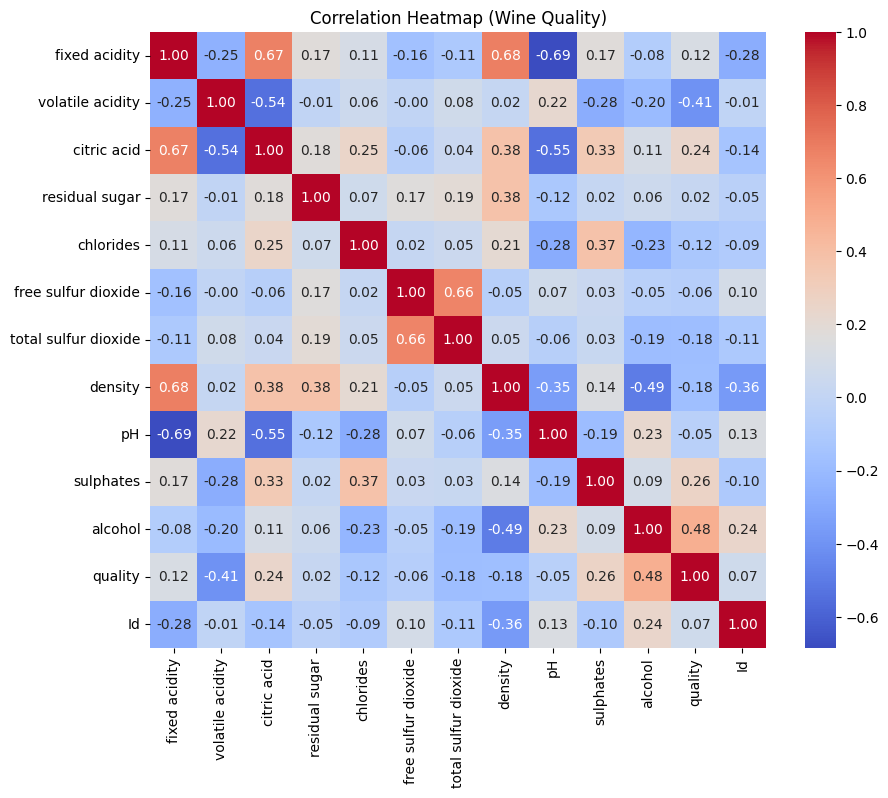

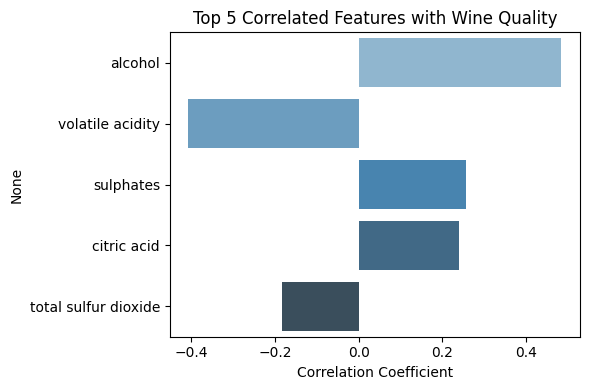

In [8]:
# Correlation analysis 
corr = df.corr(numeric_only=True)
print("\nCorrelation with target (quality):\n")
print(corr["quality"].sort_values(ascending=False))

# Heatmap (full)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap (Wine Quality)")
plt.show()

# Bar plot: top contributors to quality (absolute correlation)
top_corr = (
    corr["quality"]
    .drop("quality")
    .reindex(corr["quality"].drop("quality").abs().sort_values(ascending=False).index)
    .head(5)
)
plt.figure(figsize=(6,4))
sns.barplot(
    x=top_corr.values,
    y=top_corr.index,
    hue=top_corr.index,
    palette="Blues_d",
    legend=False
)
plt.title("Top 5 Correlated Features with Wine Quality")
plt.xlabel("Correlation Coefficient")
plt.tight_layout()
plt.show()

In [9]:
# --- Select features (top-3 by importance from prior analysis) + target ---
needed_cols = ["alcohol", "volatile acidity", "sulphates", "citric acid", "quality"]
missing = [c for c in needed_cols if c not in df.columns]
if missing:
    raise ValueError(f"These required columns are missing in the CSV: {missing}")

df_model = df[needed_cols].copy()

In [10]:
# quick peek
print(df_model.describe().T)

                   count       mean       std   min     25%    50%    75%  \
alcohol           1143.0  10.442111  1.082196  8.40  9.5000  10.20  11.10   
volatile acidity  1143.0   0.531339  0.179633  0.12  0.3925   0.52   0.64   
sulphates         1143.0   0.657708  0.170399  0.33  0.5500   0.62   0.73   
citric acid       1143.0   0.268364  0.196686  0.00  0.0900   0.25   0.42   
quality           1143.0   5.657043  0.805824  3.00  5.0000   6.00   6.00   

                    max  
alcohol           14.90  
volatile acidity   1.58  
sulphates          2.00  
citric acid        1.00  
quality            8.00  


# Split features (X) and target (y)

In [12]:
# --- Split features/target ---
X = df_model[["alcohol", "volatile acidity", "sulphates", "citric acid"]]
y = df_model["quality"]

In [13]:
# --- Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape, "| Test shape:", X_test.shape)

Train shape: (914, 4) | Test shape: (229, 4)


In [14]:
# --- Train Random Forest ---
rf = RandomForestRegressor(random_state=42, n_estimators=300)
rf.fit(X_train, y_train)

,n_estimators,300
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [15]:
# --- Predict on test data ---
y_pred = rf.predict(X_test)

# --- Evaluate performance ---
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print("Baseline Random Forest:")
print("RMSE:", round(rmse, 3))
print("MAE :", round(mae, 3))
print("R^2 :", round(r2, 3))

Baseline Random Forest:
RMSE: 0.582
MAE : 0.436
R^2 : 0.392


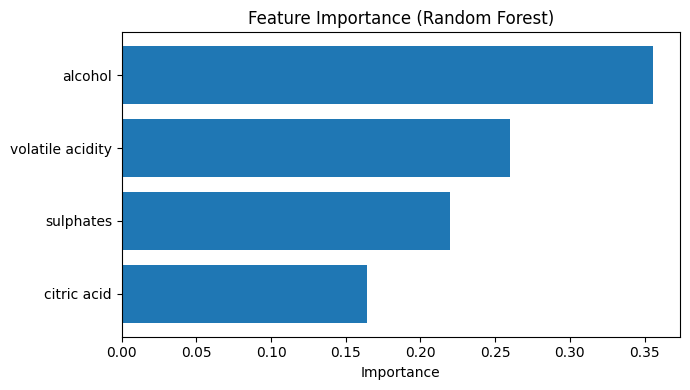

In [16]:
# --- Plot: Feature importance (only these 3) ---
feat_names = ["alcohol", "volatile acidity", "sulphates", "citric acid"]
importances = rf.feature_importances_

imp_df = pd.DataFrame({"Feature": feat_names, "Importance": importances}) \
           .sort_values("Importance", ascending=True)

plt.figure(figsize=(7,4))
plt.barh(imp_df["Feature"], imp_df["Importance"])
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

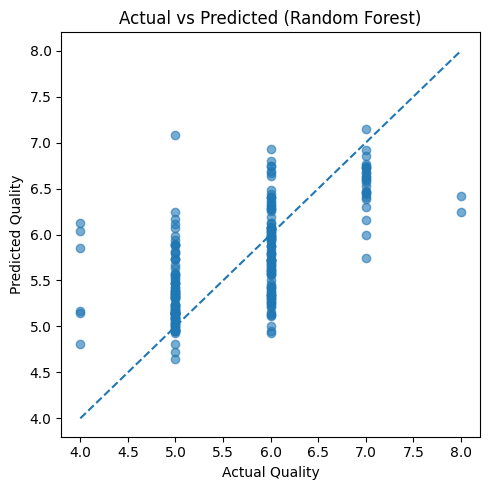

In [17]:
# --- Plot: Predicted vs Actual ---
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle="--")
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual vs Predicted (Random Forest)")
plt.tight_layout()
plt.show()

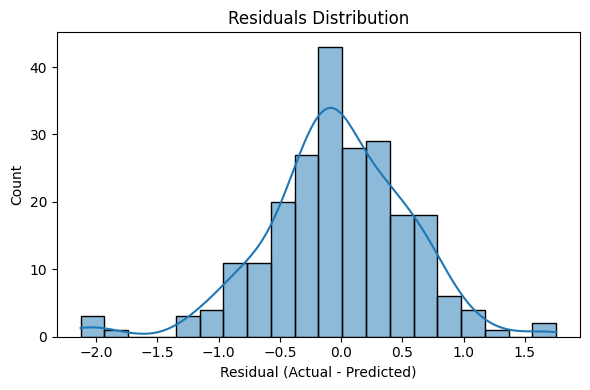

In [18]:
# --- Plot: Residuals ---
residuals = y_test - y_pred
plt.figure(figsize=(6,4))
sns.histplot(residuals, bins=20, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Residual (Actual - Predicted)")
plt.tight_layout()
plt.show()

## Feedforward Neural Network

In [20]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks, regularizers
from sklearn.preprocessing import StandardScaler
import numpy as np

In [21]:
# --- Scale X and y (fit on train only) ---
x_scaler = StandardScaler().fit(X_train)        # you already have X_train
Xtr = x_scaler.transform(X_train).astype("float32")
Xte = x_scaler.transform(X_test).astype("float32")

y_scaler = StandardScaler().fit(y_train.values.reshape(-1,1))
ytr = y_scaler.transform(y_train.values.reshape(-1,1)).astype("float32")
yte = y_scaler.transform(y_test.values.reshape(-1,1)).astype("float32")

In [22]:
# --- Model: a bit more capacity + L2 (no dropout) ---
model = keras.Sequential([
    layers.Input(shape=(Xtr.shape[1],)),
    layers.Dense(64, activation="relu", kernel_regularizer=regularizers.l2(1e-4)),
    layers.Dense(32, activation="relu", kernel_regularizer=regularizers.l2(1e-4)),
    layers.Dense(1, activation="linear"),
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=keras.losses.Huber(),          # try "mae" or "mse" to compare
    metrics=["mae","mse"]
)

es = callbacks.EarlyStopping(patience=20, restore_best_weights=True, monitor="val_loss")
rlr = callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=8, min_lr=1e-5)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,433 (9.50 KB)

 Trainable params: 2,433 (9.50 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
history = model.fit(
    Xtr, ytr,
    validation_split=0.2,
    epochs=300,
    batch_size=32,
    callbacks=[es, rlr],
    verbose=0
)

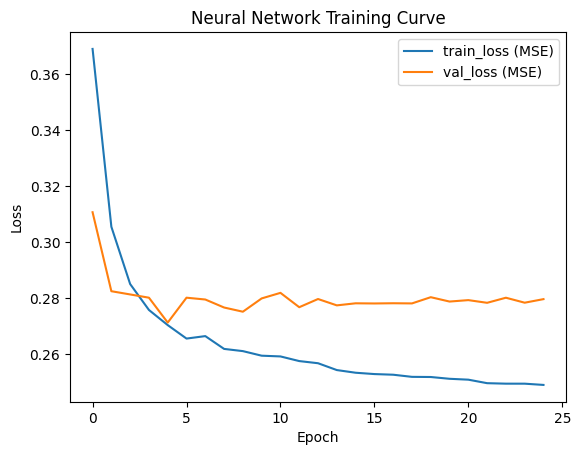

In [24]:
plt.plot(history.history["loss"], label="train_loss (MSE)")
plt.plot(history.history["val_loss"], label="val_loss (MSE)")
plt.title("Neural Network Training Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [25]:
# Evaluate (invert scaling for metrics you report)
ypred_scaled = model.predict(Xte).ravel()
ypred = y_scaler.inverse_transform(ypred_scaled.reshape(-1,1)).ravel()

rmse_nn = np.sqrt(mean_squared_error(y_test, ypred))
mae_nn  = mean_absolute_error(y_test, ypred)
r2_nn   = r2_score(y_test, ypred)

print("Neural Network Performance:")
print("RMSE:", round(rmse_nn, 3))
print("MAE :", round(mae_nn, 3))
print("R^2 :", round(r2_nn, 3))

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Neural Network Performance:
RMSE: 0.604
MAE : 0.468
R^2 : 0.345
